<a href="https://colab.research.google.com/github/dthimiri/Projects/blob/main/outliers_detection_boxplots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.dropna()

7


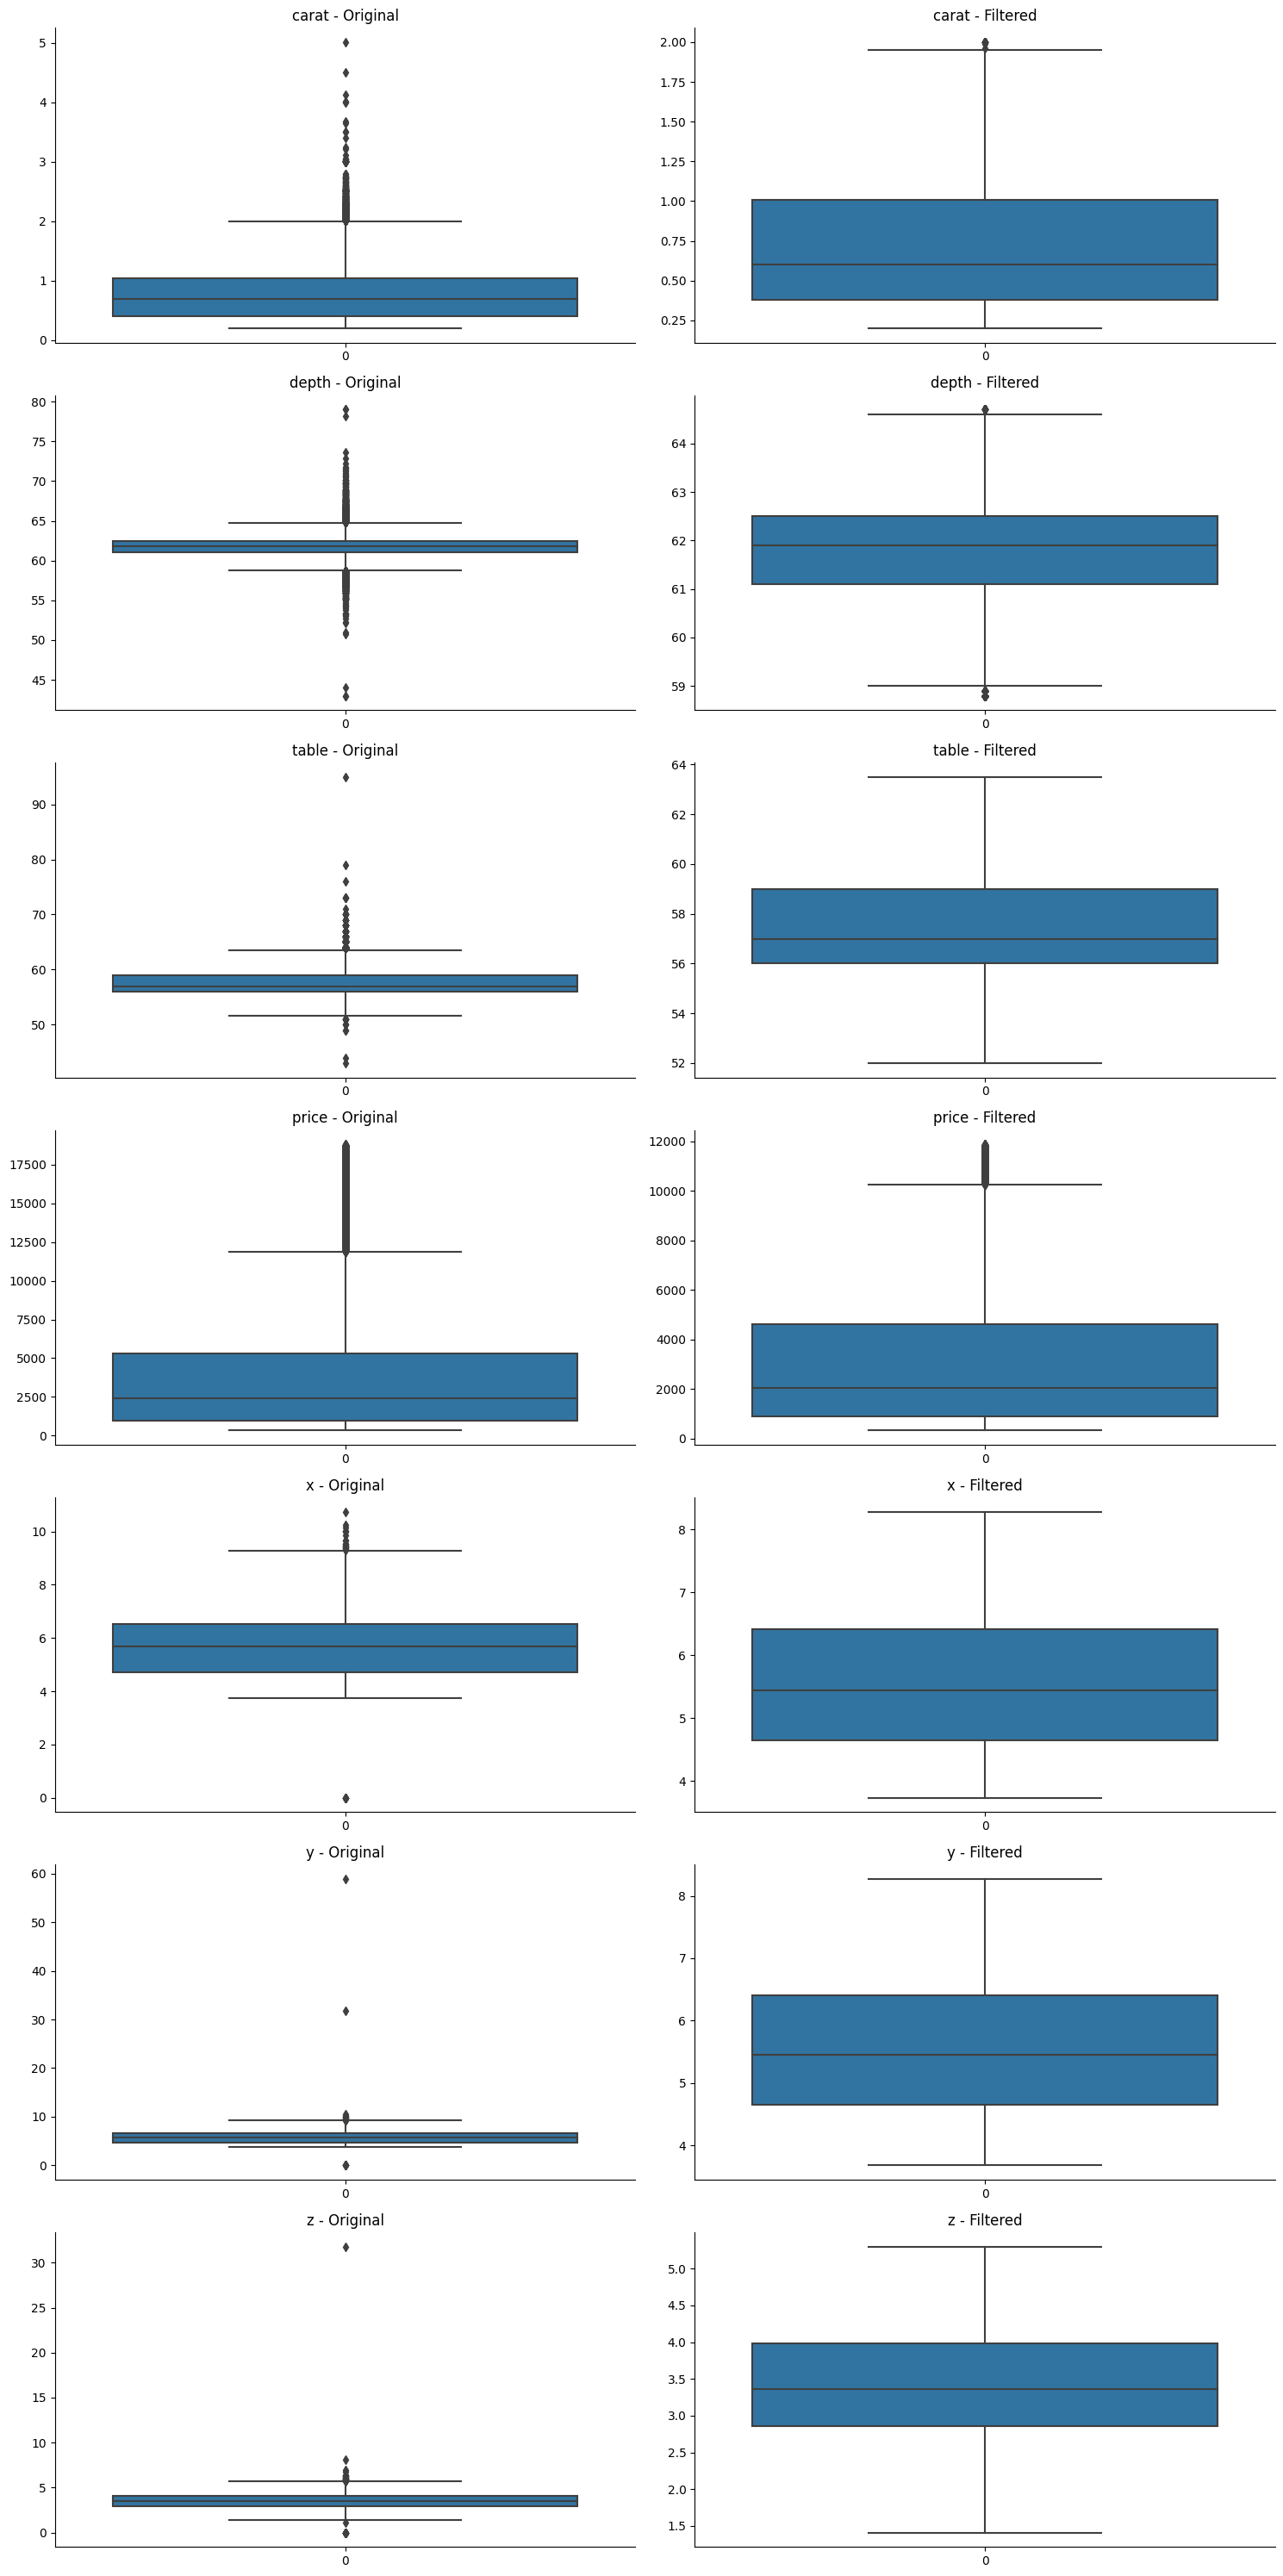

In [ ]:
def func_iqr(df):
  dict_iqr = {}
  for col in df.select_dtypes(include=['float64', 'int64']):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = round((q1 - (1.5*iqr)),2)
    upper_limit = round((q3 + (1.5*iqr)),2)
    dict_iqr[col] = [lower_limit, upper_limit]
  return dict_iqr

def func_drop_outliers(df, func_iqr):
  iqr_dict = func_iqr(df)
  df_filtered = df.copy()
  for col in iqr_dict:
    lower_limit = iqr_dict[col][0]
    upper_limit = iqr_dict[col][1]
    df_filtered = df_filtered[(df_filtered[col] >= lower_limit) & (df_filtered[col] <= upper_limit)]
  return df, df_filtered

# Func call
df_original, df_filtered = func_drop_outliers(df, func_iqr)


# Select only numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
print(len(num_cols))

# Create a figure with subplots for each pair of columns
fig, axes = plt.subplots(nrows=len(num_cols), ncols=2, figsize=(15, 30))

# Loop through each pair of columns and plot the original and filtered data
for i, col in enumerate(df.select_dtypes(include=['float64','int64'])):
    # Plot the original data in the left column
    sns.boxplot(df[col], ax=axes[i][0])
    axes[i][0].set_title(f'{col} - Original')
    sns.despine(ax=axes[i][0])
    
    # Plot the filtered data in the right column
    sns.boxplot(df_filtered[col], ax=axes[i][1])
    axes[i][1].set_title(f'{col} - Filtered')
    sns.despine(ax=axes[i][1])
    
# Adjust the spacing between subplots
fig.tight_layout()




